# Data analysis cyclic peptides


### Imports

In [3]:
import statistics
import os
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering

## Enrichment analysis

In [4]:
folder ="C:/Users/lmwin/OneDrive - University of Southampton/04Projects/Databank/CSVs/"
df1 = pd.read_csv("%sinitial_ssp.csv"%(folder))
df2 = pd.read_csv("%sHIF Ssp pan 1-CPs.csv"%(folder))
df3 = pd.read_csv("%sHIF Ssp pan 2-CPs.csv"%(folder))

out='C:/Users/lmwin/Desktop/'

In [5]:
df=df2[["Sequence"]]
df=df.join(df1["initial Ssp"])
df=df.join(df2["HIF Ssp pan 1"])
df=df.join(df3["HIF Ssp pan 2"])

df.head()

,Sequence,initial Ssp,HIF Ssp pan 1,HIF Ssp pan 2
0,CGGGGG,0.000221,0.000000,0.000000
1,CGGGGE,0.000037,0.000059,0.000092
2,CGGGGV,0.000738,0.000470,0.000031
3,CGGGGA,0.000996,0.000411,0.000092
4,CGGGGR,0.000332,0.000118,0.000062


In [6]:
df = df.set_axis(["sequence","initial [%]", "pan 1 [%]", "pan 2 [%]"], axis=1)

In [7]:
# replace zeros in initial sequence by 0.5 times the smallest

print("Minimum value initial: ", df["initial [%]"].min())

min_initial=df["initial [%]"].drop_duplicates().nsmallest(2).iloc[-1]
print("Second smallest value initial: ", min_initial)
df["initial [%]"].replace(0, min_initial/2, inplace = True)

print("Minimum value initial after processing: ", df["initial [%]"].min())

Minimum value initial:  0.0
Second smallest value initial:  3.687697729742647e-05
Minimum value initial after processing:  1.8438488648713234e-05


In [8]:
# Find values where the initial library value is higher than pan 2 and remove them
dfcrop= df.drop(df[df["initial [%]"]>=df["pan 2 [%]"]].index)
print(len(dfcrop)," out of ", len(df), " cyclic peptide sequences are enriched")

#drop all that aren't enriched over pan 1
dfcrop= dfcrop.drop(dfcrop[dfcrop["pan 1 [%]"]>=dfcrop["pan 2 [%]"]].index)
dfcrop= dfcrop[dfcrop["pan 1 [%]"]!=0]

print(len(dfcrop)," cyclic peptide sequences are enriched properly")

32363  out of  3200000  cyclic peptide sequences are enriched
3670  cyclic peptide sequences are enriched properly


In [9]:
# Add a ranking column (by pan 2)
dfcrop.sort_values(by="pan 2 [%]", inplace =True, ascending=False)
dfcrop["rank_p2"]=np.arange(1,len(dfcrop)+1,1)

# generate a new column for the enrichment of pan 2 towards the initial library
dfcrop['enr2']=dfcrop["pan 2 [%]"].divide(dfcrop["initial [%]"])

# generate a new column for the enrichment of pan 2 towards the initial library
dfcrop['enr2to1']=dfcrop["pan 2 [%]"].divide(dfcrop["pan 1 [%]"])


dfcrop.sort_values(by="pan 2 [%]", inplace =True, ascending=False)
dfcrop=dfcrop[:2000]
dfcrop.head(25)

,sequence,initial [%],pan 1 [%],pan 2 [%],rank_p2,enr2,enr2to1
703109,CRTYIL,0.001512,0.902072,15.775460,1,10433.808564,17.488026
718849,CRLYVL,0.002766,1.607203,8.961609,2,3240.181984,5.575902
382849,CVTYVL,0.003540,1.514992,3.732241,3,1054.248792,2.463538
702049,CRTIVL,0.001807,0.787763,3.426756,4,1896.407806,4.349983
823389,CKVFLL,0.000590,0.340576,3.063567,5,5192.207264,8.995239
763909,CRILIL,0.000590,0.418095,2.818680,6,4777.166765,6.741720
719102,CRLYIV,0.000369,0.298967,2.141815,7,5807.999403,7.164056
1619397,CSVWLY,0.000148,0.147985,2.021942,8,13707.347853,13.663182
2955889,CFLLNL,0.000369,0.068409,1.509228,9,4092.603047,22.061793
767506,CRIFIM,0.000369,0.113839,1.319366,10,3577.750344,11.589763


In [10]:
dfcrop["rank_overall"]=dfcrop["rank_p2"]+10000/dfcrop["enr2"]+100/dfcrop["enr2to1"]
dfcrop.sort_values(by="rank_overall", inplace =True, ascending=True)
dfcrop

,sequence,initial [%],pan 1 [%],pan 2 [%],rank_p2,enr2,enr2to1,rank_overall
703109,CRTYIL,0.001512,0.902072,15.775460,1,10433.808564,17.488026,7.676621
2955889,CFLLNL,0.000369,0.068409,1.509228,9,4092.603047,22.061793,15.976156
1619397,CSVWLY,0.000148,0.147985,2.021942,8,13707.347853,13.663182,16.048475
823389,CKVFLL,0.000590,0.340576,3.063567,5,5192.207264,8.995239,18.042955
767506,CRIFIM,0.000369,0.113839,1.319366,10,3577.750344,11.589763,21.423356
...,...,...,...,...,...,...,...,...
1086062,CMIIAV,0.000184,0.000118,0.000185,2009,1.001984,1.571791,12052.822427
1175233,CTMFED,0.000184,0.000176,0.000185,1998,1.001984,1.047861,12073.633265
2413070,CIEPDS,0.000184,0.000176,0.000185,2004,1.001984,1.047861,12079.633265
2424250,CIAGPS,0.000184,0.000176,0.000185,2029,1.001984,1.047861,12104.633265


## Analysis top 25

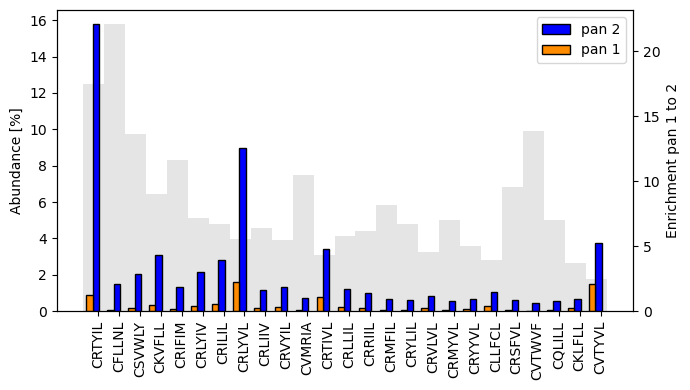

In [11]:
fig, ax = plt.subplots(figsize =(7,4))
ax2 = ax.twinx()
ax.set_zorder(ax2.get_zorder()+1) # put ax in front of ax2
ax.patch.set_visible(False) 
colors=["red","darkorange","blue", "red", "green"]

width=0.3
multiplier=0
x = np.arange(25)

ax.bar(x+0.1,dfcrop["pan 2 [%]"][:25], width= width, label = "pan 2", color = "blue", ec= "k")
ax.bar(x-0.2,dfcrop["pan 1 [%]"][:25], width= width, label = "pan 1", color = "darkorange", ec= "k")

ax2.bar(x,dfcrop["enr2to1"][:25], width= 1, label = "enr 12", color = "gray", alpha =0.2)


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Abundance [%]')
ax2.set_ylabel("Enrichment pan 1 to 2")
ax.set_xticks(x+ 0.2, dfcrop["sequence"][:25], rotation = 90)
ax.legend(loc='upper right')
plt.tight_layout()
plt.savefig(f"{out}/01Analysis/Pan12_barchart.png", dpi=400)
plt.savefig(f"{out}/01Analysis/Pan12_barchart.svg", dpi=400)

plt.show()


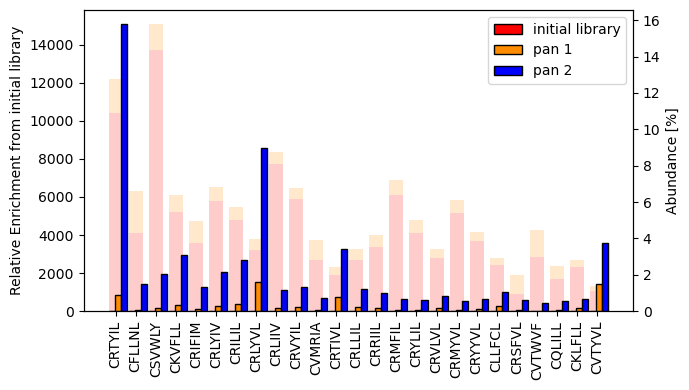

In [12]:
dfcrop.sort_values(by="rank_overall", ascending = True, inplace=True)

barchart={"initial library": dfcrop["initial [%]"][:25],
         "pan 1": dfcrop["pan 1 [%]"][:25],
         "pan 2": dfcrop["pan 2 [%]"][:25]}#,
enr={"enrichment": (dfcrop["enr2"][:25])}#+(dfcrop["enr2to1"]*100)[:25])}
enr2={"enrichment": dfcrop["enr2"][:25], "enrichment2": 100*dfcrop["enr2to1"][:25]}

x = np.arange(25)  # the labels
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize =(7,4))
ax2 = ax.twinx()
colors=["red","darkorange","blue", "red"]
ax.bar(x+0.2, enr["enrichment"], 0.7, label="enrichment factor", color="red",alpha = 0.2)
ax.bar(x+0.2, enr2["enrichment2"], 0.7,bottom =enr["enrichment"], label="enrichment factor", color="darkorange", alpha = 0.2)


for i,pan, in enumerate(barchart.keys()):
    offset = width * multiplier
    rects = ax2.bar(x + offset, barchart[pan], width, label=pan, color=colors[i], edgecolor = "k")
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('Abundance [%]')
ax.set_ylabel("Relative Enrichment from initial library")
ax.set_xticks(x+ 0.2, dfcrop["sequence"][:25], rotation = 90)
ax2.legend(loc='upper right')
plt.tight_layout()
plt.savefig(f"{out}new_barchart.png", dpi=400)
plt.savefig(f"{out}new_barchart.svg", dpi=400)

plt.show()
#ax.set(xlabel="new rank", ylabel="rank by occurence [%]")
dfcrop.sort_values(by="rank_overall", ascending = True, inplace=True)


In [13]:
dfcrop.to_csv(f"{out}dfcrop.csv")

In [14]:
# one hot encode top sequences
aa_split = [[i for i in seq] for seq in dfcrop["sequence"][:20]]
aa_split_df=pd.DataFrame(aa_split, columns=["a1","a2","a3","a4","a5","a6"])

## Hierachical clustering

In [15]:
one_hot_encoded_data = pd.get_dummies(aa_split_df) 
one_hot_encoded_data.head()

,a1_C,a2_F,a2_K,a2_L,a2_R,a2_S,a2_V,a3_I,a3_L,a3_M,...,a5_C,a5_I,a5_L,a5_N,a5_V,a6_A,a6_L,a6_M,a6_V,a6_Y
0,True,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
1,True,True,False,False,False,False,False,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,True,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
3,True,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
4,True,False,False,False,True,False,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False


In [51]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
        
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    hierarchy.set_link_color_palette(['olive',"g","b","purple","mediumvioletred",'red'])
    fig, ax=plt.subplots(1, 1, figsize=(5, 6))
    D = dendrogram(linkage_matrix,ax=ax,orientation='left',color_threshold=3,above_threshold_color='dimgrey', **kwargs)

    ax.spines['left'].set_color('white')        
    ax.spines['top'].set_color('white') 
    ax.spines['right'].set_color('white') 
    ax.spines['bottom'].set_color('white') 
          
    ax.tick_params(axis='x', colors='white')   
    ax.tick_params(axis='y', colors='black')
    plt.savefig("Tree_1.svg", dpi = 500, bbox_inches = "tight")
    plt.show()
    return linkage_matrix, D

In [27]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(one_hot_encoded_data)
print(len(one_hot_encoded_data))
print(len(model.children_))
# print(list(zip(sequences[:50],model.children_)))

20
19


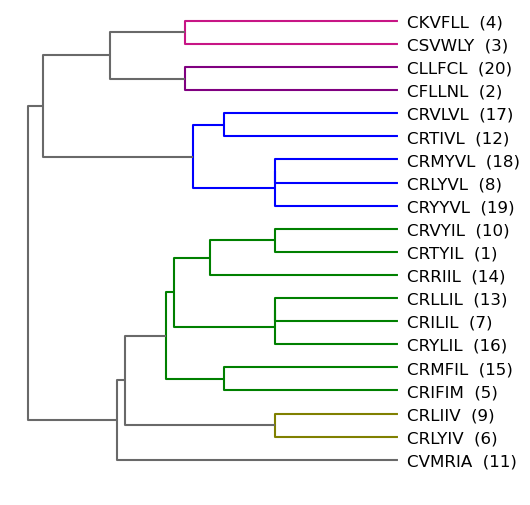

In [52]:
labels = dfcrop["sequence"].values[:20]
labels =[f"{i}  ({n+1})" for n,i in enumerate(labels)]
lm, D=plot_dendrogram(model, truncate_mode="level", p=6, labels=labels)

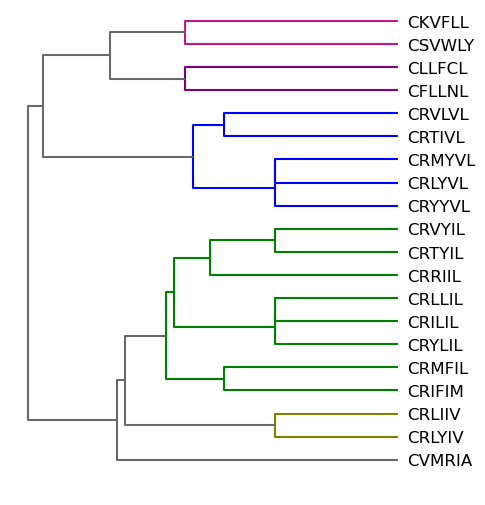

In [53]:
lm, D=plot_dendrogram(model, truncate_mode="level", p=6, labels=dfcrop["sequence"].values[:20])


In [29]:
import scipy.cluster.hierarchy as sch
import radialtree as rt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
black_cmap = mcolors.LinearSegmentedColormap.from_list('black_cmap', ['black', 'black'], N=256)

0.15000000000000002
1.1500000000000001


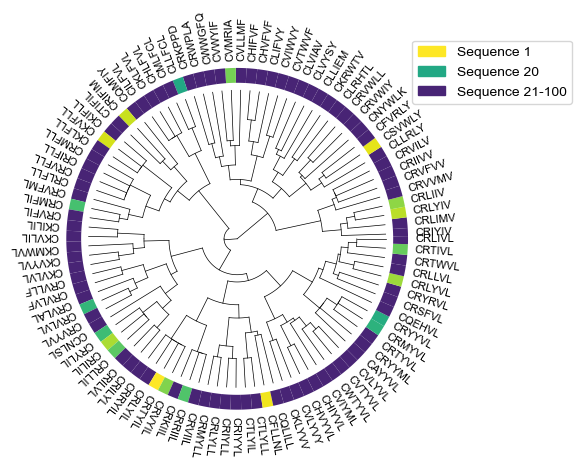

In [51]:
fig, ax = plt.subplots()
mapped=list(np.linspace(1, 0.6, 20))+[0.1 for i in range(80)]


type_num=50
cmp=plt.cm.viridis
colors_dict={"color":cmp(mapped)}
rt.radialTreee(D,colorlabels=colors_dict, pallete=black_cmap, ax = ax)


# Define the colors and titles
colors = [cmp(mapped[0]), cmp(mapped[19]), cmp(0.1)] # Example colors from viridis
titles = ['Sequence 1', 'Sequence 20', 'Sequence 21-100']

# Create custom legend entries
legend_patches = [mpatches.Patch(color=colors[i], label=titles[i]) for i in range(len(titles))]

# Add the custom legend to the plot
plt.legend(handles=legend_patches, loc = "upper right",bbox_to_anchor=(1.5, 1.1))
plt.tight_layout()
plt.savefig("radial_tree.svg", dpi=400)
plt.show()